In [1]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt




In [2]:
%matplotlib inline

# Change the default colormap of matplotlib
# plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with a specific size
plt.figure(figsize=(200, 200))

<Figure size 20000x20000 with 0 Axes>

<Figure size 20000x20000 with 0 Axes>

In [3]:
# Set the correct path 
image_path = "/home/bat/bat/programs/code/projects/energy-meter-ocr/proj/actual_meter.jpg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Get the height and width of the image
height, width = image.shape[:2]

# Crop the top half of the image
image = image[0:height//2, :]


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use thresholding to binarize the image
_, binary_image = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)

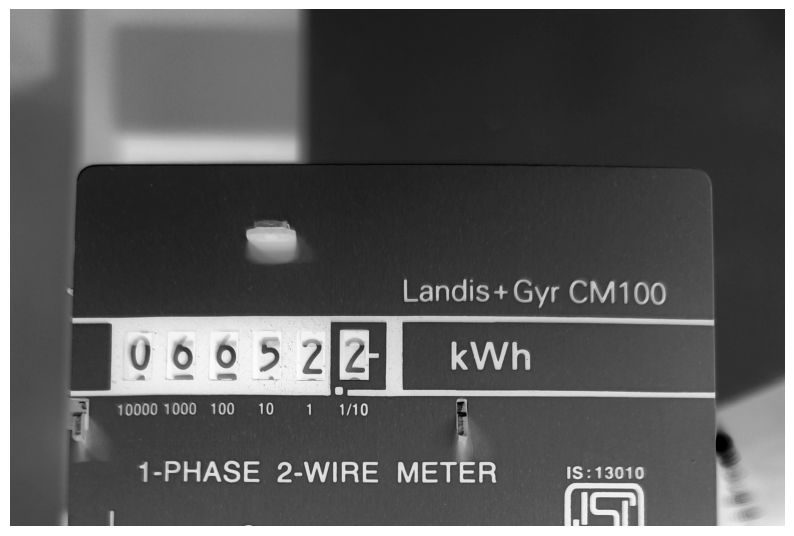

In [4]:
res =  - gray


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.imshow(res)  # Display the image
ax.axis('off') # Optionally, you can turn off axis ticks if you want
plt.show() # Show the plot


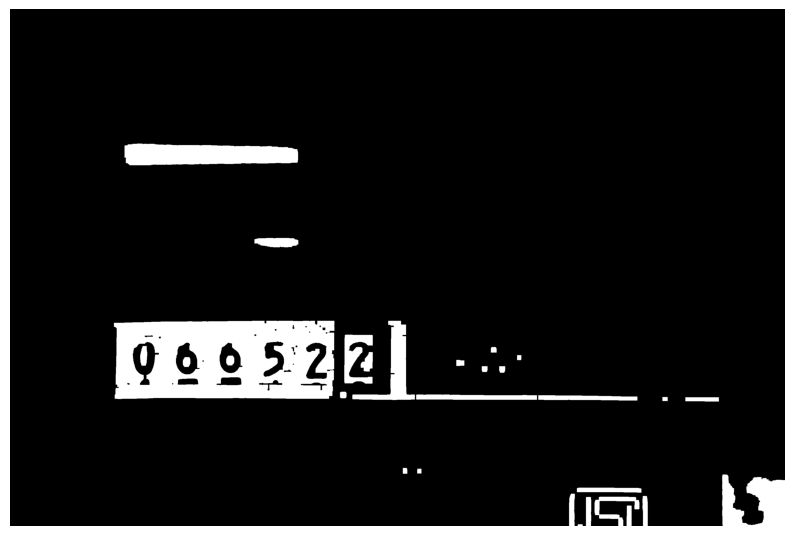

In [5]:
# Define the kernel (structuring element)
kernel = np.ones((2, 2), np.uint8)  

# Perform erosion
erosion_result = cv2.erode(res, kernel, iterations=18)

_, thresh = cv2.threshold(erosion_result, 175, 255, cv2.THRESH_BINARY)

# Perform dilation
dilated_result = cv2.dilate(thresh, kernel, iterations=15)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.imshow(dilated_result)  # Display the image
ax.axis('off') # Optionally, you can turn off axis ticks if you want
plt.show() # Show the plot


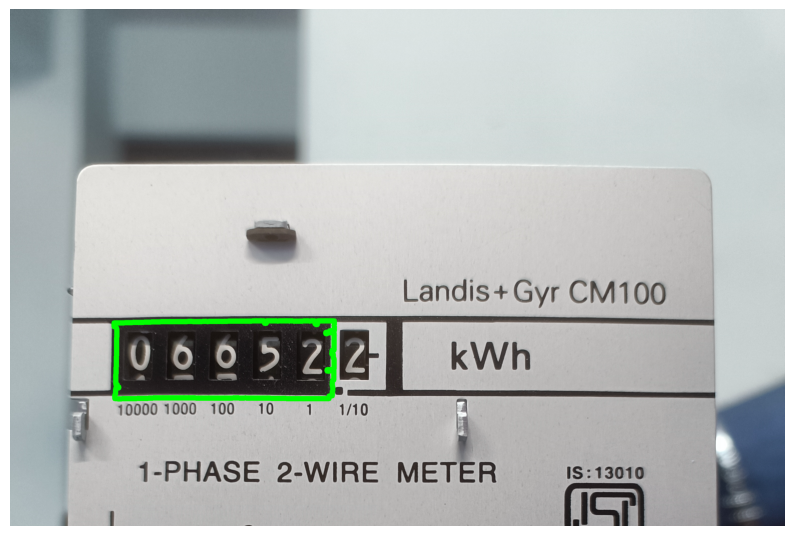

In [9]:

# Find contours
contours, _ = cv2.findContours(dilated_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour based on area
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on a copy of the original image
image_with_largest_contour = image.copy()
cv2.drawContours(image_with_largest_contour, [largest_contour], -1, (0, 255, 0), 20)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.imshow(image_with_largest_contour)  # Display the image
ax.axis('off') # Optionally, you can turn off axis ticks if you want
plt.show() # Show the plot

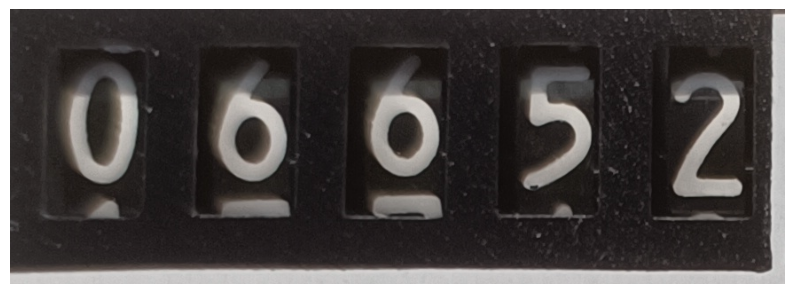

In [11]:
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the region within the rectangle
final_crop = image[y:y + h, x:x + w]



# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.imshow(final_crop)  # Display the image
ax.axis('off') # Optionally, you can turn off axis ticks if you want
plt.show() # Show the plot

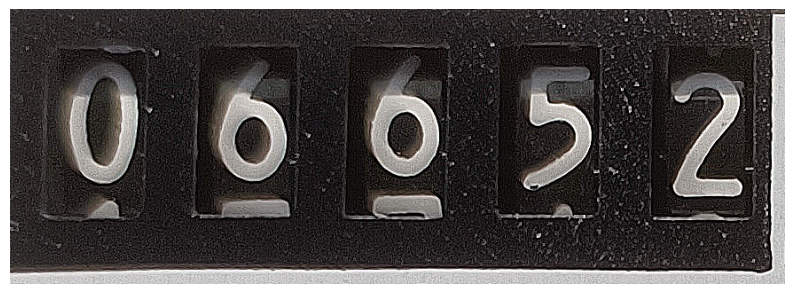

In [13]:
# Apply a sharpening filter
sharpening_filter = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(final_crop, -1, sharpening_filter)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.imshow(sharpened_image)  # Display the image
ax.axis('off') # Optionally, you can turn off axis ticks if you want
plt.show() # Show the plot


In [15]:
# Perform OCR on the image
custom_config = r'--oem 3 --psm 6'  # Customize OCR settings if needed
text = pytesseract.image_to_string(sharpened_image, config=custom_config)

# Print the extracted text
print("Extracted Text:", text)

Extracted Text: 066 52]

